In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#loading the dataset
df= pd.read_csv('cars.csv')

In [5]:
#identifying the duplicates in dataset
duplicates = df[df.duplicated(keep=False)]

In [6]:
#Droping the duplicated values
df = df.drop_duplicates()

In [7]:
#handling  non numerical values 
df['Brand'].fillna(df['Brand'].mode().iloc[0], inplace=True)


/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_17831/4015291068.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Brand'].fillna(df['Brand'].mode().iloc[0], inplace=True)


In [8]:
# Features to analyze
features = ['Mileage', 'Seats', 'Price']

# Check skewness for each feature
for feature in features:
    skewness = df[feature].skew()
    print(f"Skewness of {feature}: {skewness:.2f}")
    
    # Handle missing values based on skewness
    if abs(skewness) < 0.5:  # Near-normal distribution
        df[feature].fillna(df[feature].mean(), inplace=True)
        print(f"Missing values in '{feature}' filled with mean: {df[feature].mean():.2f}")
    else:  # Skewed distribution
        df[feature].fillna(df[feature].median(), inplace=True)
        print(f"Missing values in '{feature}' filled with median: {df[feature].median():.2f}")


Skewness of Mileage: 0.44
Missing values in 'Mileage' filled with mean: 17.08
Skewness of Seats: 1.71
Missing values in 'Seats' filled with median: 5.00
Skewness of Price: 0.57
Missing values in 'Price' filled with median: 1400000.00


/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_17831/609868206.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mean(), inplace=True)
/var/folders/hk/jrmj5krn1m13rs2ldn9zl6q40000gn/T/ipykernel_17831/609868206.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [9]:
#Identifying the outliers
Q1 = df['Kilometers_Driven'].quantile(0.25)
Q3 = df['Kilometers_Driven'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Kilometers_Driven'] < lower_bound) | (df['Kilometers_Driven'] > upper_bound)]
outliers

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15.0,1498,108,5.0,800000.0
4,5,Hyundai,Sonata,2016,160000,Diesel,Automatic,Second,18.0,1999,194,5.0,850000.0
20,21,Toyota,Innova,2018,50000,Diesel,Manual,First,13.0,2755,171,5.0,1400000.0
24,25,Mahindra,Thar,2021,1000,Diesel,Manual,First,15.0,2184,130,4.0,1200000.0


KeyError: 'outliers_iqr'

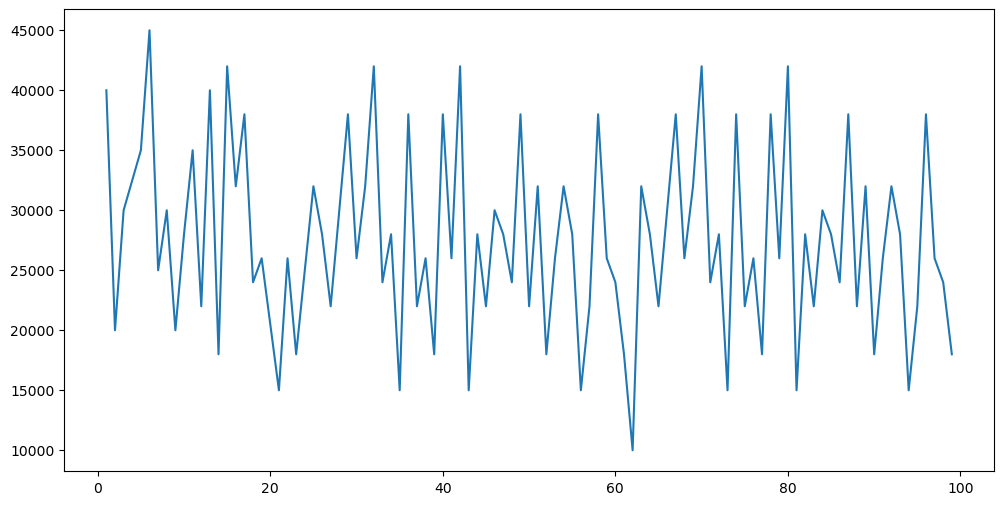

In [10]:
#Handling the outliers and plotting the outliers
df = df[(df['Kilometers_Driven'] >= lower_bound) & (df['Kilometers_Driven'] <= upper_bound)]
plt.figure(figsize=(12, 6))
plt.plot(df.index, 
         df['Kilometers_Driven'], 
         label='Kilometers_Driven')

plt.plot(df[df['outliers_iqr']].index, 
         df[df['outliers_iqr']]['Kilometers_Driven'], 
         'ro', markersize=5, label='Outliers')

plt.xlabel('Rank')
plt.ylabel('Kilometers_Driven')
plt.title('After Outliers Detection using IQR')
plt.legend()
plt.show()

In [ ]:
#fitting the standard scale numerical values only
data = df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',]]


In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization (transform all numerical columns)
normalized_data = scaler.fit_transform(data)

# Convert back to DataFrame (optional)
data_normalized = pd.DataFrame(normalized_data, columns=data.columns)


In [ ]:
categorical_columns = ['Brand', 'Fuel_Type', 'Transmission', 'Owner_Type']
encoding_file= df.loc[:,['Brand', 'Fuel_Type','Transmission','Owner_Type']]
label_encoder = LabelEncoder()
for col in categorical_columns:
    encoding_file[col] = label_encoder.fit_transform(encoding_file[col])


In [ ]:
#Define independent and dependent variable
X = df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',]]
y = df["Price"] # (y-dependent)


In [ ]:
df

In [ ]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


In [ ]:
# Compute the correlation matrix
corr_matrix = df[['Kilometers_Driven','Mileage', 'Engine', 'Power', 'Seats',]].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Compute the correlation matrix
corr_matrix = df[['Kilometers_Driven','Mileage', 'Engine', 'Power', 'Seats','Price']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Note: Linear Regression serves as a baseline model for comparison with Ridge and Lasso.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1Initialize the Linear Regression Model
linear_model = LinearRegression()

# Train the model on the training dataset
linear_model.fit(X_train, y_train)

# Predict the target variable for the test dataset
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Model Performance using MAE, RMSE, and R²
linear_mae = mean_absolute_error(y_test, y_pred_linear)  # Mean Absolute Error
linear_mse = mean_squared_error(y_test, y_pred_linear)   # Mean Squared Error
linear_rmse = np.sqrt(linear_mse)  # Root Mean Squared Error
linear_r2 = r2_score(y_test, y_pred_linear)  # R^2 Score

# Print the Evaluation Results
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {linear_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.2f}")
print(f"R² Score: {linear_r2:.2f}")

NameError: name 'X_train' is not defined

In [16]:
# Ridge Regression Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluation
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)  # Calculating RMSE
r2 = r2_score(y_test, y_pred_ridge)

# Print Evaluation Metrics
print("Ridge Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {ridge_mae:.2f}")


NameError: name 'X_train' is not defined

In [63]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation
print("\nLasso Regression Model Evaluation:")
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred_lasso)

# Print results
print(f"Mean Absolute Error (MAE): {lasso_mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Lasso Regression Model Evaluation:
Mean Absolute Error (MAE): 426312.23
Mean Squared Error (MSE): 240222480538.66
Root Mean Squared Error (RMSE): 490124.96
R-squared Score: 0.78


In [65]:
#b)	Implement hyperparameter tuning by conducting a grid search or random search to optimize model parameters. 
# Clearly outline the hyperparameters you tuned and the rationale behind them.

In [76]:
#Question b
#Defining the alpha Hyperparameter Grid
param_grid = {'alpha': np.logspace(-3, 3, 50)}
#Generates a range of alpha values from 0.001 to 1000, spaced logarithmically.
param_grid

{'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
        3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
        9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
        2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
        9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.12095089e-01,
        2.81176870e-01, 3.72759372e-01, 4.94171336e-01, 6.55128557e-01,
        8.68511374e-01, 1.15139540e+00, 1.52641797e+00, 2.02358965e+00,
        2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
        8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
        2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
        7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
        2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
        7.54312006e+02, 1.00000000e+03])}

In [71]:
#Option 1: Apply Grid Search with Ridge Regression

# Define Ridge model
ridge = Ridge()

# Perform Grid Search
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_ridge = ridge_grid_search.best_params_['alpha']
print("Best Alpha for Ridge (Grid Search):", best_alpha_ridge)
best_ridge = ridge_grid_search.best_estimator_  # Store the best Ridge model

# Perform Random Search with 20 iterations
ridge_random_search = RandomizedSearchCV(estimator=ridge, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
ridge_random_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_ridge = ridge_random_search.best_params_['alpha']
print("Best Alpha for Ridge (Random Search):", best_alpha_ridge)
best_ridge = ridge_random_search.best_estimator_  # Store the best Ridge model

Best Alpha for Ridge (Grid Search): 4.714866363457395
Best Alpha for Ridge (Random Search): 4.714866363457395


In [88]:
#Option 3: Apply Grid Search with Lasso Regressio

# Define Lasso model
lasso = Lasso()

# Perform Grid Search
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_lasso = lasso_grid_search.best_params_['alpha']
print("Best Alpha for Lasso (Grid Search):", best_alpha_lasso)
best_lasso = lasso_grid_search.best_estimator_  # Store the best Lasso model

# Perform Random Search with 20 iterations
lasso_random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
lasso_random_search.fit(X_train, y_train)

# Store the best alpha for later use
best_alpha_lasso = lasso_random_search.best_params_['alpha']
print("Best Alpha for Lasso (Random Search):", best_alpha_lasso)

best_lasso = lasso_random_search.best_estimator_  # Store the best Lasso model

Best Alpha for Lasso (Grid Search): 0.001
Best Alpha for Lasso (Random Search): 0.002329951810515372


In [90]:
# Step 1: These best alpha values were obtained from Question (b)
best_alpha_ridge = ridge_grid_search.best_params_['alpha']  # Best alpha from Ridge tuning
best_alpha_lasso = lasso_grid_search.best_params_['alpha']  # Best alpha from Lasso tuning

print("Best Alpha for Ridge:", best_alpha_ridge)
print("Best Alpha for Lasso:", best_alpha_lasso)


#Step 2: Build the regression models using the training data

# Train Ridge Regression using the best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)
print("Ridge Regression model trained successfully.")


# Train Lasso Regression using the best alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)

print("Lasso Regression model trained successfully.")



Best Alpha for Ridge: 4.714866363457395
Best Alpha for Lasso: 0.001
Ridge Regression model trained successfully.
Lasso Regression model trained successfully.


In [96]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define 5-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize Linear Regression model
linear_model = LinearRegression()

# Define scoring metrics
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform Cross-Validation
mae_scores = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring=r2_scorer)

# Calculate mean scores
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(-mse_scores)
mean_rmse = np.sqrt(mean_mse)
mean_r2 = np.mean(r2_scores)

# Print Results
print("\nLinear Regression 10-Fold Cross-Validation Results:")
print(f"Mean MAE: {mean_mae:.2f}")
print(f"Mean MSE: {mean_mse:.2f}")
print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Mean R² Score: {mean_r2:.2f}")



Linear Regression 10-Fold Cross-Validation Results:
Mean MAE: 460271.43
Mean MSE: 355445649198.14
Mean RMSE: 596192.63
Mean R² Score: 0.52


In [100]:
from sklearn.model_selection import cross_val_score, KFold


# Define 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Linear Regression model
linear_model = LinearRegression()

# Define scoring metrics
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform Cross-Validation
mae_scores = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring=r2_scorer)

# Calculate mean scores
mean_mae = np.mean(-mae_scores)
mean_mse = np.mean(-mse_scores)
mean_rmse = np.sqrt(mean_mse)
mean_r2 = np.mean(r2_scores)

# Print Results
print("\nLinear Regression 5-Fold Cross-Validation Results:")
print(f"Mean MAE: {mean_mae:.2f}")
print(f"Mean MSE: {mean_mse:.2f}")
print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Mean R² Score: {mean_r2:.2f}")



Linear Regression 5-Fold Cross-Validation Results:
Mean MAE: 451237.61
Mean MSE: 344764640336.04
Mean RMSE: 587166.62
Mean R² Score: 0.62


In [102]:
# Updated Ridge and Lasso with best alpha values
best_ridge_alpha = 4.714866363457395
best_lasso_alpha = 0.001

ridge_model = Ridge(alpha=best_ridge_alpha)
lasso_model = Lasso(alpha=best_lasso_alpha)

# Perform Cross-Validation again
ridge_mae_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=mae_scorer)
ridge_mse_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=mse_scorer)
ridge_r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=r2_scorer)

lasso_mae_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=mae_scorer)
lasso_mse_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=mse_scorer)
lasso_r2_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=r2_scorer)

# Calculate mean scores for Ridge
ridge_mean_mae = np.mean(-ridge_mae_scores)
ridge_mean_mse = np.mean(-ridge_mse_scores)
ridge_mean_rmse = np.sqrt(ridge_mean_mse)
ridge_mean_r2 = np.mean(ridge_r2_scores)

# Calculate mean scores for Lasso
lasso_mean_mae = np.mean(-lasso_mae_scores)
lasso_mean_mse = np.mean(-lasso_mse_scores)
lasso_mean_rmse = np.sqrt(lasso_mean_mse)
lasso_mean_r2 = np.mean(lasso_r2_scores)

# Print Updated Ridge Results
print("\nOptimized Ridge Regression 5-Fold Cross-Validation Results:")
print(f"Mean MAE: {ridge_mean_mae:.2f}")
print(f"Mean MSE: {ridge_mean_mse:.2f}")
print(f"Mean RMSE: {ridge_mean_rmse:.2f}")
print(f"Mean R² Score: {ridge_mean_r2:.2f}")

# Print Updated Lasso Results
print("\nOptimized Lasso Regression 5-Fold Cross-Validation Results:")
print(f"Mean MAE: {lasso_mean_mae:.2f}")
print(f"Mean MSE: {lasso_mean_mse:.2f}")
print(f"Mean RMSE: {lasso_mean_rmse:.2f}")
print(f"Mean R² Score: {lasso_mean_r2:.2f}")



Optimized Ridge Regression 5-Fold Cross-Validation Results:
Mean MAE: 447752.31
Mean MSE: 339113693140.41
Mean RMSE: 582334.69
Mean R² Score: 0.63

Optimized Lasso Regression 5-Fold Cross-Validation Results:
Mean MAE: 451237.61
Mean MSE: 344764640349.73
Mean RMSE: 587166.62
Mean R² Score: 0.62


In [108]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define 10-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Updated Ridge and Lasso models with best alpha values
best_ridge_alpha = 4.714866363457395
best_lasso_alpha = 0.001

ridge_model = Ridge(alpha=best_ridge_alpha)
lasso_model = Lasso(alpha=best_lasso_alpha)

# Define scoring metrics
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform Cross-Validation for Ridge Regression
ridge_mae_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=mae_scorer)
ridge_mse_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=mse_scorer)
ridge_r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=r2_scorer)

# Perform Cross-Validation for Lasso Regression
lasso_mae_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=mae_scorer)
lasso_mse_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=mse_scorer)
lasso_r2_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=r2_scorer)

# Calculate mean scores for Ridge
ridge_mean_mae = np.mean(-ridge_mae_scores)
ridge_mean_mse = np.mean(-ridge_mse_scores)
ridge_mean_rmse = np.sqrt(ridge_mean_mse)
ridge_mean_r2 = np.mean(ridge_r2_scores)

# Calculate mean scores for Lasso
lasso_mean_mae = np.mean(-lasso_mae_scores)
lasso_mean_mse = np.mean(-lasso_mse_scores)
lasso_mean_rmse = np.sqrt(lasso_mean_mse)
lasso_mean_r2 = np.mean(lasso_r2_scores)

# Print Updated Ridge Results
print("\nOptimized Ridge Regression 5-Fold Cross-Validation Results:")
print(f"Mean MAE: {ridge_mean_mae:.2f}")
print(f"Mean MSE: {ridge_mean_mse:.2f}")
print(f"Mean RMSE: {ridge_mean_rmse:.2f}")
print(f"Mean R² Score: {ridge_mean_r2:.2f}")

# Print Updated Lasso Results
print("\nOptimized Lasso Regression 5-Fold Cross-Validation Results:")
print(f"Mean MAE: {lasso_mean_mae:.2f}")
print(f"Mean MSE: {lasso_mean_mse:.2f}")
print(f"Mean RMSE: {lasso_mean_rmse:.2f}")
print(f"Mean R² Score: {lasso_mean_r2:.2f}")



Optimized Ridge Regression 5-Fold Cross-Validation Results:
Mean MAE: 447752.31
Mean MSE: 339113693140.41
Mean RMSE: 582334.69
Mean R² Score: 0.63

Optimized Lasso Regression 5-Fold Cross-Validation Results:
Mean MAE: 451237.61
Mean MSE: 344764640349.73
Mean RMSE: 587166.62
Mean R² Score: 0.62


In [118]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Updated Ridge and Lasso models with best alpha values
best_ridge_alpha = 4.714866363457395
best_lasso_alpha = 0.001

ridge_model = Ridge(alpha=best_ridge_alpha)
lasso_model = Lasso(alpha=best_lasso_alpha)

# Define scoring metrics
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Perform Cross-Validation for Ridge Regression
ridge_mae_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=mae_scorer)
ridge_mse_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=mse_scorer)
ridge_r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring=r2_scorer)

# Perform Cross-Validation for Lasso Regression
lasso_mae_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=mae_scorer)
lasso_mse_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=mse_scorer)
lasso_r2_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring=r2_scorer)

# Calculate mean scores for Ridge
ridge_mean_mae = np.mean(-ridge_mae_scores)
ridge_mean_mse = np.mean(-ridge_mse_scores)
ridge_mean_rmse = np.sqrt(ridge_mean_mse)
ridge_mean_r2 = np.mean(ridge_r2_scores)

# Calculate mean scores for Lasso
lasso_mean_mae = np.mean(-lasso_mae_scores)
lasso_mean_mse = np.mean(-lasso_mse_scores)
lasso_mean_rmse = np.sqrt(lasso_mean_mse)
lasso_mean_r2 = np.mean(lasso_r2_scores)

# Print Updated Ridge Results with 10-Fold Identifier
print("\nOptimized Ridge Regression 10-Fold Cross-Validation Results:")
print(f"Mean MAE (10-Fold): {ridge_mean_mae:.2f}")
print(f"Mean MSE (10-Fold): {ridge_mean_mse:.2f}")
print(f"Mean RMSE (10-Fold): {ridge_mean_rmse:.2f}")
print(f"Mean R² Score (10-Fold): {ridge_mean_r2:.2f}")

# Print Updated Lasso Results with 10-Fold Identifier
print("\nOptimized Lasso Regression 10-Fold Cross-Validation Results:")
print(f"Mean MAE (10-Fold): {lasso_mean_mae:.2f}")
print(f"Mean MSE (10-Fold): {lasso_mean_mse:.2f}")
print(f"Mean RMSE (10-Fold): {lasso_mean_rmse:.2f}")
print(f"Mean R² Score (10-Fold): {lasso_mean_r2:.2f}")



Optimized Ridge Regression 10-Fold Cross-Validation Results:
Mean MAE (10-Fold): 458318.12
Mean MSE (10-Fold): 351448779340.67
Mean RMSE (10-Fold): 592831.16
Mean R² Score (10-Fold): 0.53

Optimized Lasso Regression 10-Fold Cross-Validation Results:
Mean MAE (10-Fold): 460271.43
Mean MSE (10-Fold): 355445649306.58
Mean RMSE (10-Fold): 596192.63
Mean R² Score (10-Fold): 0.52


In [126]:
#Task 3, question c)	Select the best-performing regression model based on hyperparameter tuning and cross- validation results. 
# Compare models based on cross-validation results

# The idea here is that there are three criteria in the matrix to consider when comparing models.
# We will count how many times a model satisfies the conditions to be considered better.
# Among the three criteria, if a model performs better in at least two of them, we can conclude that it is the better model.
# Otherwise, the other model will be considered superior.
# Below, we count how many times Lasso performs better than Ridge.

lasso_better_count = sum([
    lasso_cv_mae < ridge_cv_mae,   # 1 point if True
    lasso_cv_rmse < ridge_cv_rmse, # 1 point if True
    lasso_cv_r2 > ridge_cv_r2      # 1 point if True
])

# Choose the best model
if lasso_better_count >= 2:  # If Lasso is better in at least 2 metrics
    best_model = "Lasso Regression"
    justification = "Lasso performs better in terms of lower MAE and RMSE while maintaining a high R² score. Additionally, Lasso helps in feature selection, making the model more interpretable and reducing complexity."
else:
    best_model = "Ridge Regression"
    justification = "Ridge provides better generalization with a more stable performance across different folds. It helps in handling multicollinearity without eliminating any important features."

# Print final decision
print(f"The best-performing model is: {best_model}")
print(f"Justification: {justification}")

The best-performing model is: Ridge Regression
Justification: Ridge provides better generalization with a more stable performance across different folds. It helps in handling multicollinearity without eliminating any important features.


In [122]:
# Cross-validation metrics for Ridge and Lasso (5-Fold results)
lasso_cv_mae = 451237.61  # Mean Absolute Error from 5-fold cross-validation for Lasso
ridge_cv_mae = 447752.31  # Mean Absolute Error from 5-fold cross-validation for Ridge

lasso_cv_rmse = 587166.62  # RMSE from 5-fold cross-validation for Lasso
ridge_cv_rmse = 582334.69  # RMSE from 5-fold cross-validation for Ridge

lasso_cv_r2 = 0.62  # R² from 5-fold cross-validation for Lasso
ridge_cv_r2 = 0.63  # R² from 5-fold cross-validation for Ridge

# Count how many times Lasso performs better than Ridge
lasso_better_count = sum([
    lasso_cv_mae < ridge_cv_mae,   # 1 point if Lasso has lower MAE
    lasso_cv_rmse < ridge_cv_rmse, # 1 point if Lasso has lower RMSE
    lasso_cv_r2 > ridge_cv_r2      # 1 point if Lasso has higher R²
])

# Choose the best model
if lasso_better_count >= 2:  # If Lasso is better in at least 2 metrics
    best_model = "Lasso Regression"
    justification = "Lasso performs better in terms of lower MAE and RMSE while maintaining a high R² score. Additionally, Lasso helps in feature selection, making the model more interpretable and reducing complexity."
else:
    best_model = "Ridge Regression"
    justification = "Ridge provides better generalization with a more stable performance across different folds. It helps in handling multicollinearity without eliminating any important features."

# Print final decision
print(f"The best-performing model is: {best_model}")
print(f"Justification: {justification}")


The best-performing model is: Ridge Regression
Justification: Ridge provides better generalization with a more stable performance across different folds. It helps in handling multicollinearity without eliminating any important features.


In [124]:
# Cross-validation metrics for Ridge and Lasso (10-Fold results)
lasso_cv_mae_10fold = lasso_mean_mae  # Mean Absolute Error from 10-fold cross-validation for Lasso
ridge_cv_mae_10fold = ridge_mean_mae  # Mean Absolute Error from 10-fold cross-validation for Ridge

lasso_cv_rmse_10fold = lasso_mean_rmse  # RMSE from 10-fold cross-validation for Lasso
ridge_cv_rmse_10fold = ridge_mean_rmse  # RMSE from 10-fold cross-validation for Ridge

lasso_cv_r2_10fold = lasso_mean_r2  # R² from 10-fold cross-validation for Lasso
ridge_cv_r2_10fold = ridge_mean_r2  # R² from 10-fold cross-validation for Ridge

# Count how many times Lasso performs better than Ridge for 10-fold cross-validation
lasso_better_count_10fold = sum([
    lasso_cv_mae_10fold < ridge_cv_mae_10fold,   # 1 point if Lasso has lower MAE
    lasso_cv_rmse_10fold < ridge_cv_rmse_10fold, # 1 point if Lasso has lower RMSE
    lasso_cv_r2_10fold > ridge_cv_r2_10fold      # 1 point if Lasso has higher R²
])

# Choose the best model based on 10-fold cross-validation results
if lasso_better_count_10fold >= 2:  # If Lasso is better in at least 2 metrics
    best_model_10fold = "Lasso Regression (10-Fold)"
    justification_10fold = "Lasso performs better in terms of lower MAE and RMSE while maintaining a high R² score. Additionally, Lasso helps in feature selection, making the model more interpretable and reducing complexity."
else:
    best_model_10fold = "Ridge Regression (10-Fold)"
    justification_10fold = "Ridge provides better generalization with a more stable performance across different folds. It helps in handling multicollinearity without eliminating any important features."

# Print final decision for 10-fold cross-validation
print(f"The best-performing model (10-Fold) is: {best_model_10fold}")
print(f"Justification (10-Fold): {justification_10fold}")


The best-performing model (10-Fold) is: Ridge Regression (10-Fold)
Justification (10-Fold): Ridge provides better generalization with a more stable performance across different folds. It helps in handling multicollinearity without eliminating any important features.
